<a href="https://colab.research.google.com/github/ju-liana-rodrigues/estudo-de-caso-score/blob/main/projetoinicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Instalação das bibliotecas
!pip install pandas numpy scikit-learn
import pandas as pd

In [10]:
df=pd.read_csv('/content/drive/MyDrive/Estudo de Caso Score de crédito/Estudo de caso Score dos clientes/clientes.csv')


In [12]:
# importação da tabela clientes

tabela = pd.read_csv('/content/drive/MyDrive/Estudo de Caso Score de crédito/Estudo de caso Score dos clientes/clientes.csv')
display(tabela)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


In [13]:
# buscando se existe valores vazios ou valores com o  formato errado
print(tabela.info())
print(tabela.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

In [50]:
from sklearn.preprocessing import LabelEncoder

# Separar as colunas categóricas (exceto 'score_credito')
colunas_categoricas = tabela.select_dtypes(include=['object']).drop('score_credito', axis=1).columns

# Criar um dicionário para armazenar os codificadores
codificadores = {}

# Aplicar o LabelEncoder para cada coluna categórica
for coluna in colunas_categoricas:
    codificador = LabelEncoder()
    tabela[coluna] = codificador.fit_transform(tabela[coluna].fillna('missing'))
    codificadores[coluna] = codificador

# Validar as transformações
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

In [15]:

#Instalação das bibliotecas
!pip install pandas numpy scikit-learn

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Para escalonamento

# Seleciona as features (exceto 'score_credito' e 'id_cliente')
X = tabela.drop(['score_credito', 'id_cliente'], axis=1)

# Define a variável alvo
y = tabela['score_credito']

# Divide os dados em treino e teste, garantindo a estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Escalona os dados (opcional, dependendo do algoritmo)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


modelo_arvore = RandomForestClassifier() # modelo arvore de decisao
modelo_knn = KNeighborsClassifier() # modelo do KNN (nearest neighbors - vizinhos mais proximos)




In [43]:
# treinando os modelos
modelo_arvore.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)


KNeighborsClassifier()

In [44]:
# previsão de Acurácia do modelo
#contagem_scores = tabela["score_credito"].value_counts()
#print(contagem_scores['Standard'] / sum(contagem_scores))

0.53174


In [54]:
from sklearn.metrics import accuracy_score

#  previsoes
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste.to_numpy())


# comparando as previsoes com o y_teste
print(accuracy_score(y_teste, previsao_arvore))
print(accuracy_score(y_teste, previsao_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8230666666666666
0.7324


In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Carregar os dados dos novos clientes
novos_clientes = pd.read_csv('/content/drive/MyDrive/Estudo de Caso Score de crédito/Estudo de caso Score dos clientes/novos_clientes.csv')
display(tabela)

# Separar as colunas numéricas e categóricas
colunas_numericas = novos_clientes.select_dtypes(include=['number']).columns
colunas_categoricas = novos_clientes.select_dtypes(include=['object']).columns

# Codificar as colunas categóricas
codificador = LabelEncoder()
for coluna in colunas_categoricas:
    if coluna != "score_credito":
        novos_clientes[coluna] = codificador.fit_transform(novos_clientes[coluna].fillna('missing'))  # Tratar valores ausentes

# Normalizar as colunas numéricas (opcional, se necessário)
scaler = StandardScaler()
novos_clientes[colunas_numericas] = scaler.fit_transform(novos_clientes[colunas_numericas])

# Prever os resultados
previsoes = modelo_arvore.predict(novos_clientes)
print(previsoes)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,2,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,11,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,0,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,2,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,11,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,0,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,11,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,3,319.164979,Standard,1,0,0,0,1


['Standard' 'Good' 'Good']


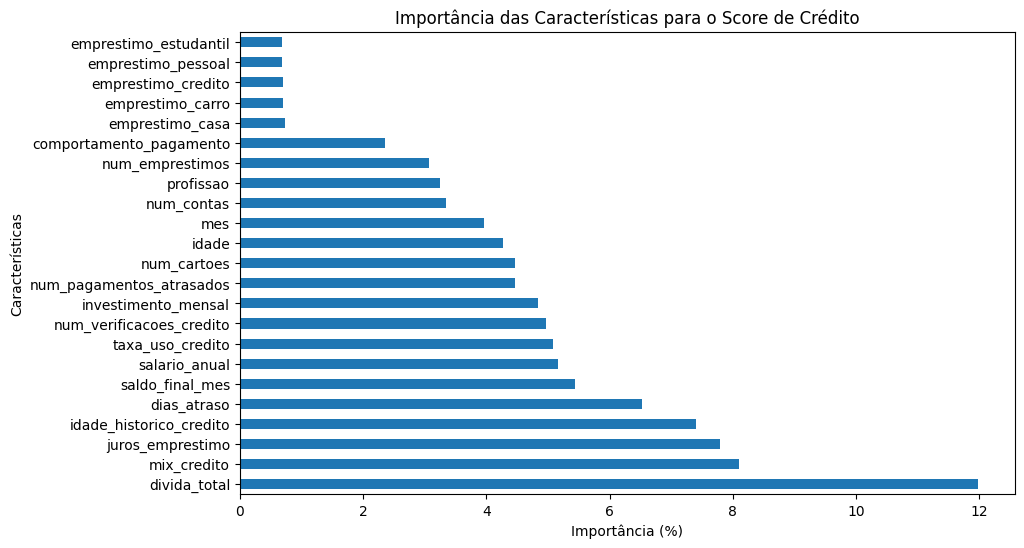

As 5 características mais importantes são:

divida_total               11.976728
mix_credito                 8.100458
juros_emprestimo            7.793346
idade_historico_credito     7.406966
dias_atraso                 6.528677
dtype: float64


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtém os nomes das colunas e as importâncias das features
feature_importances = pd.Series(modelo_arvore.feature_importances_, index=x_teste.columns)

# Ordena as features por importância
feature_importances = feature_importances.sort_values(ascending=False)

# Calcula a porcentagem de importância
feature_importances = feature_importances * 100

# Cria um gráfico de barras para visualizar as importâncias
plt.figure(figsize=(10,6))
feature_importances.plot(kind='barh')
plt.xlabel('Importância (%)')
plt.ylabel('Características')
plt.title('Importância das Características para o Score de Crédito')
plt.show()

# Imprime as 5 features mais importantes
print("As 5 características mais importantes são:\n")
print(feature_importances.head(5))